In [57]:
import numpy as np
from scipy.linalg import norm 
import matplotlib.pyplot as plt
%run -i helper.py

In [58]:
flag1 = 0
flag2 = 1
q1 = 2
q2 = 3
nflags = 2

In [59]:
reps = 200
D00 = {(0,0,0,0):1}
D01 = {(0,0,0,0):0, (0,0,0,1):1}
D10 = {(0,0,0,0):0, (0,0,1,0):1}
D11 = {(0,0,0,0):0, (0,0,1,1):1}

In [60]:
def perm1(start, n):
    reg=Reg(4)
    setstate(start, reg)
    H(flag2, reg)
    CNOT(q1, flag1, reg)
    CNOT(flag2, q2, reg)
    CRn(q1, q2, n, reg)
    CZ(q1, flag2, reg)
    CNOT(q1, flag1, reg)
    CNOT(flag2, q2, reg)
    H(flag2, reg)
    
    return measure(flag1, reg), measure(flag2, reg), reducedrho([flag1, flag2], reg)

In [61]:
#circuit with no errors on q1
def Rn_gadget(start, reps, perm):
    flag1_x = []
    flag2_x = []
    for n in range(1,11):
        flag1_temp = []
        flag2_temp = []
        for _ in range(reps):
            res1, res2, _ = perm(start, n)
            flag1_temp.append(res1)
            flag2_temp.append(res2)
        flag1_x.append(flag1_temp.count(1))
        flag2_x.append(flag2_temp.count(1))

    xax = np.linspace(1,10,10)
    plt.plot(xax, np.array(flag1_x)/reps, color='tab:green', alpha=0.5, lw=4)
    plt.scatter(xax, np.array(flag1_x)/reps, label=r'$|$0$\rangle$  flag', color='tab:green', lw=12)
    
    plt.plot(xax, np.array(flag2_x)/reps, color='tab:blue', alpha=0.5, lw=4)
    plt.scatter(xax, np.array(flag2_x)/reps, label=r'$|$+$\rangle$ flag', color='tab:blue', lw=12)
    
    #plt.title(r'No errors', fontsize=18)
    #plt.xlabel(r'$n$', fontsize=16)
    #plt.ylabel('Proportion Triggered', fontsize=16)
    plt.ylim([-0.1,1.1])
    plt.xticks(fontsize=26)
    plt.yticks([])
    #plt.yticks(fontsize=14)

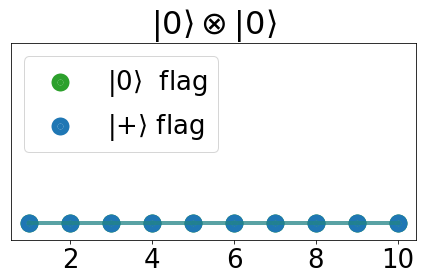

In [62]:
Rn_gadget(D00, reps, perm1)
plt.title(r'$|0\rangle\otimes|0\rangle$', fontsize=32)
plt.legend(fontsize=26, loc='upper left')
plt.tight_layout()
plt.savefig('plots/rn_gadget_prop_d00.pdf')

plt.show()

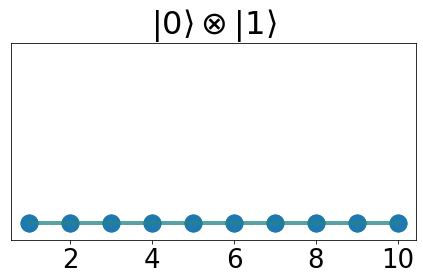

In [63]:
Rn_gadget(D01, reps, perm1)
plt.title(r'$|0\rangle\otimes|1\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_gadget_prop_d01.pdf')

plt.show()

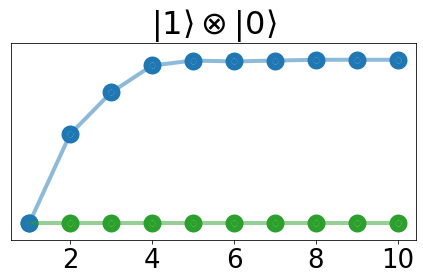

In [64]:
Rn_gadget(D10, reps, perm1)
plt.title(r'$|1\rangle\otimes|0\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_gadget_prop_d10.pdf')

plt.show()

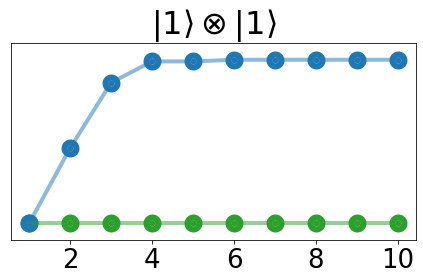

In [65]:
Rn_gadget(D11, reps, perm1)
plt.title(r'$|1\rangle\otimes|1\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_gadget_prop_d11.pdf')

plt.show()

In [66]:
def benchmark_fid(start, n, perm):
    #_, _, rho1 = perm(start, n)
    reg=Reg(4)
    setstate(start, reg)
    H(flag2, reg)
    CNOT(q1, flag1, reg)
    CNOT(flag2, q2, reg)
    CRn(q1, q2, n, reg)
    CZ(q1, flag2, reg)
    CNOT(q1, flag1, reg)
    CNOT(flag2, q2, reg)
    H(flag2, reg)
    rho1 = reducedrho([flag1, flag2], reg)
    
    reg2=Reg(4)
    setstate(start, reg2)
    CRn(q1, q2, n, reg2)
    rho2 = reducedrho([flag1, flag2], reg2)
    
    return fidelity(rho1, rho2)

In [67]:
starts = [D00, D01, D10, D11]

In [68]:
fid = []
for n in range(1,11):
    fid_temp = []
    for start in starts:
        fid_temp.append(benchmark_fid(start, n, perm1))
    fid.append(fid_temp)

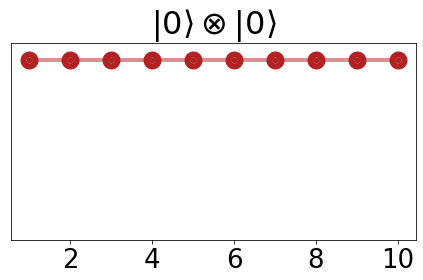

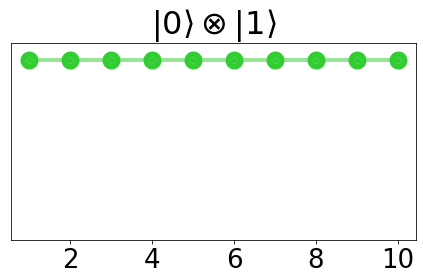

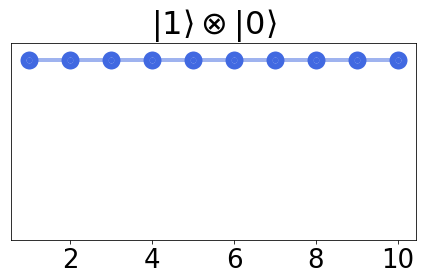

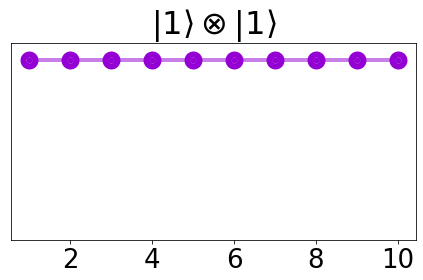

In [69]:
fid = np.array(fid)
xax = np.linspace(1,10,10)

plt.figure(1)
plt.scatter(xax, fid[:,0], label=r'$|$+$\rangle$ flag', color='firebrick', lw=12)
plt.plot(xax, fid[:,0], color='firebrick', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=28)
#plt.ylabel(r'Fidelity',fontsize=16)
plt.yticks([])
plt.title(r'$|0\rangle\otimes|0\rangle$', fontsize=32)
plt.tight_layout()
#plt.savefig('plots/rn_gadget_d00.pdf')

plt.figure(2)
plt.scatter(xax, fid[:,1], label=r'$|$+$\rangle$ flag', color='limegreen', lw=12)
plt.plot(xax, fid[:,1], color='limegreen', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=28)
#plt.ylabel(r'Fidelity',fontsize=16)
plt.yticks([])
plt.title(r'$|0\rangle\otimes|1\rangle$', fontsize=32)
plt.tight_layout()
#plt.savefig('plots/rn_gadget_d01.pdf')

plt.figure(3)
plt.scatter(xax, fid[:,2], label=r'$|$+$\rangle$ flag', color='royalblue', lw=12)
plt.plot(xax, fid[:,2], color='royalblue', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=26)
#plt.ylabel(r'Fidelity',fontsize=16)
plt.yticks([])
plt.title(r'$|1\rangle\otimes|0\rangle$', fontsize=32)
plt.tight_layout()
#plt.savefig('plots/rn_gadget_d10.pdf')

plt.figure(4)
plt.scatter(xax, fid[:,3], label=r'$|$+$\rangle$ flag', color='darkviolet', lw=12)
plt.plot(xax, fid[:,3], color='darkviolet', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=26)
#plt.ylabel(r'Fidelity',fontsize=16)
plt.yticks([])
plt.title(r'$|1\rangle\otimes|1\rangle$', fontsize=32)
plt.tight_layout()
#plt.savefig('plots/rn_gadget_d11.pdf')

plt.show()

In [70]:
def perm2(start, n):
    reg=Reg(4)
    setstate(start, reg)
    H(flag2, reg)
    CNOT(flag2, q1, reg)
    CNOT(q2, flag1, reg)
    CRn(q1, q2, n, reg)
    CZ(flag2, q2, reg)
    CNOT(flag2, q1, reg)
    H(flag2, reg)
    CNOT(q2, flag1, reg)
    
    return measure(flag1, reg), measure(flag2, reg), reducedrho([flag1, flag2], reg)

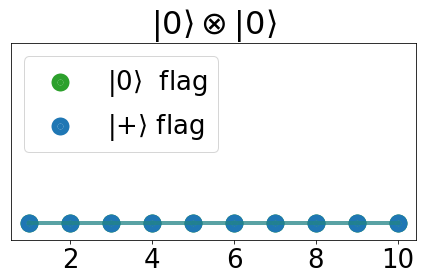

In [71]:
Rn_gadget(D00, reps, perm2)
plt.title(r'$|0\rangle\otimes|0\rangle$', fontsize=32)
plt.legend(fontsize=26, loc='upper left')
plt.tight_layout()
plt.savefig('plots/rn_gadget_prop2_d00.pdf')

plt.show()

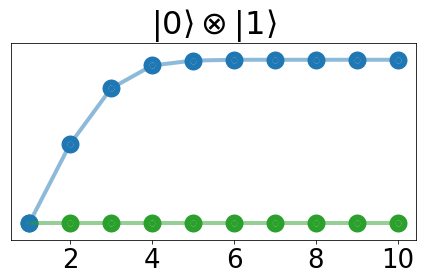

In [72]:
Rn_gadget(D01, reps, perm2)
plt.title(r'$|0\rangle\otimes|1\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_gadget_prop2_d01.pdf')

plt.show()

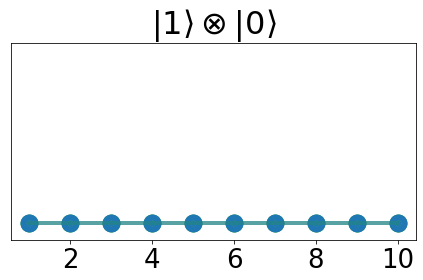

In [73]:
Rn_gadget(D10, reps, perm2)
plt.title(r'$|1\rangle\otimes|0\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_gadget_prop2_d10.pdf')

plt.show()

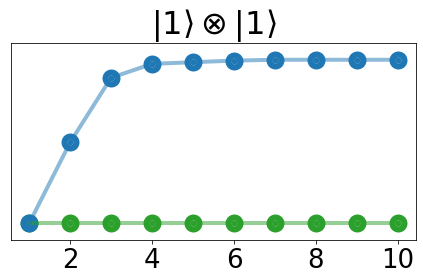

In [74]:
Rn_gadget(D11, reps, perm1)
plt.title(r'$|1\rangle\otimes|1\rangle$', fontsize=32)
plt.tight_layout()
plt.savefig('plots/rn_gadget_prop2_d11.pdf')

plt.show()

In [75]:
def benchmark_fid2(start, n, perm):
    #_, _, rho2 = perm(start, n)
    reg=Reg(4)
    setstate(start, reg)
    H(flag2, reg)
    CNOT(flag2, q1, reg)
    CNOT(q2, flag1, reg)
    CRn(q1, q2, n, reg)
    CZ(flag2, q2, reg)
    CNOT(flag2, q1, reg)
    H(flag2, reg)
    CNOT(q2, flag1, reg)
    rho1 = reducedrho([flag1, flag2], reg)
    
    reg2=Reg(4)
    setstate(start, reg2)
    CRn(q1, q2, n, reg2)
    rho2 = reducedrho([flag1, flag2], reg2)
    
    return fidelity(rho1, rho2)

In [76]:
fid = []
for n in range(1,11):
    fid_temp = []
    for start in starts:
        fid_temp.append(benchmark_fid(start, n, perm2))
    fid.append(fid_temp)

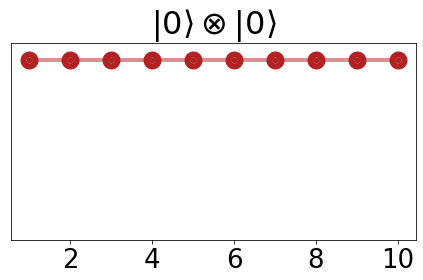

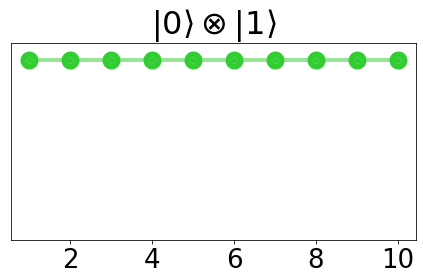

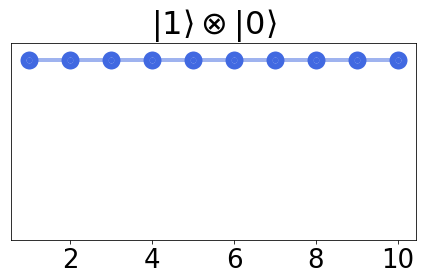

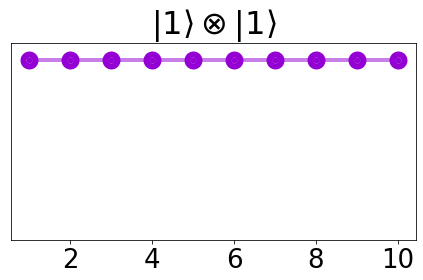

In [77]:
fid = np.array(fid)
xax = np.linspace(1,10,10)

plt.figure(1)
plt.scatter(xax, fid[:,0], label=r'$|$+$\rangle$ flag', color='firebrick', lw=12)
plt.plot(xax, fid[:,0], color='firebrick', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=28)
#plt.ylabel(r'Fidelity',fontsize=16)
plt.yticks([])
plt.title(r'$|0\rangle\otimes|0\rangle$', fontsize=32)
plt.tight_layout()
#plt.savefig('plots/rn_gadget2_d00.pdf')

plt.figure(2)
plt.scatter(xax, fid[:,1], label=r'$|$+$\rangle$ flag', color='limegreen', lw=12)
plt.plot(xax, fid[:,1], color='limegreen', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=28)
#plt.ylabel(r'Fidelity',fontsize=16)
plt.yticks([])
plt.title(r'$|0\rangle\otimes|1\rangle$', fontsize=32)
plt.tight_layout()
#plt.savefig('plots/rn_gadget2_d01.pdf')

plt.figure(3)
plt.scatter(xax, fid[:,2], label=r'$|$+$\rangle$ flag', color='royalblue', lw=12)
plt.plot(xax, fid[:,2], color='royalblue', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=26)
#plt.ylabel(r'Fidelity',fontsize=16)
plt.yticks([])
plt.title(r'$|1\rangle\otimes|0\rangle$', fontsize=32)
plt.tight_layout()
#plt.savefig('plots/rn_gadget2_d10.pdf')

plt.figure(4)
plt.scatter(xax, fid[:,3], label=r'$|$+$\rangle$ flag', color='darkviolet', lw=12)
plt.plot(xax, fid[:,3], color='darkviolet', alpha=0.5,lw=4)
plt.ylim([-0.1,1.1])
plt.xticks(fontsize=26)
#plt.xlabel(r'$n$',fontsize=26)
#plt.ylabel(r'Fidelity',fontsize=16)
plt.yticks([])
plt.title(r'$|1\rangle\otimes|1\rangle$', fontsize=32)
plt.tight_layout()
#plt.savefig('plots/rn_gadget2_d11.pdf')

plt.show()